# Portfolio Optimization - Data Exploration

This notebook explores the initial data collection and portfolio optimization implementation.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from portfolio_optimization.data import DataCollector
from portfolio_optimization.optimization import PortfolioOptimizer

# Set up plotting style
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = [12, 6]  # Larger default figure size
plt.rcParams['axes.grid'] = True          # Always show grid
plt.rcParams['axes.spines.top'] = False   # Remove top spine
plt.rcParams['axes.spines.right'] = False # Remove right spine
sns.set_palette('husl')                   # Set color palette

## 1. Data Collection and Preprocessing

In [3]:
# Initialize data collector
collector = DataCollector()

# Collect and process data
data = collector.process_data()
prices = data['prices']
returns = data['returns']['daily']

print(f"Data shape: {returns.shape}")
print(f"\nFirst few rows of returns:")
returns.head()

Successfully fetched data for AAPL
Successfully fetched data for MSFT
Successfully fetched data for GOOGL
Successfully fetched data for AMZN
Successfully fetched data for META
Successfully fetched data for AGG
Successfully fetched data for DBC
Successfully fetched data for UUP
Data shape: (2922, 8)

First few rows of returns:


,AAPL,MSFT,GOOGL,AMZN,META,AGG,DBC,UUP
Date,,,,,,,,
2012-05-21,0.058260,0.016399,0.022835,0.019921,-0.109861,-0.000180,0.013323,-0.003117
2012-05-22,-0.007679,0.000336,-0.021674,-0.012746,-0.089039,-0.002433,-0.014275,0.010273
2012-05-23,0.024400,-0.021841,0.014414,0.009056,0.032258,0.001175,-0.011052,0.003537
2012-05-24,-0.009184,-0.001374,-0.009517,-0.009389,0.032187,-0.000813,0.000385,0.003965
2012-05-25,-0.005360,-0.000344,-0.020094,-0.010918,-0.033909,0.001536,0.003467,0.001316


### Data Quality Checks

In [4]:
# Check for missing values
print("Missing values:")
print(returns.isnull().sum())

# Basic statistics
print("\nBasic statistics:")
returns.describe()

Missing values:
AAPL     0
MSFT     0
GOOGL    0
AMZN     0
META     0
AGG      0
DBC      0
UUP      0
dtype: int64

Basic statistics:


,AAPL,MSFT,GOOGL,AMZN,META,AGG,DBC,UUP
count,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000
mean,0.001011,0.001089,0.000909,0.001116,0.001082,0.000065,0.000026,0.000109
std,0.017896,0.016751,0.017078,0.020377,0.025280,0.003072,0.010764,0.004496
min,-0.128647,-0.147390,-0.116342,-0.140494,-0.263901,-0.040010,-0.079444,-0.032070
25%,-0.007520,-0.006785,-0.007092,-0.008733,-0.010045,-0.001307,-0.005684,-0.002456
50%,0.000889,0.000734,0.000784,0.000935,0.000999,0.000178,0.000625,0.000000
75%,0.010316,0.009481,0.009239,0.011422,0.012825,0.001502,0.005959,0.002729
max,0.119808,0.142169,0.162584,0.141311,0.296115,0.023721,0.047990,0.037821


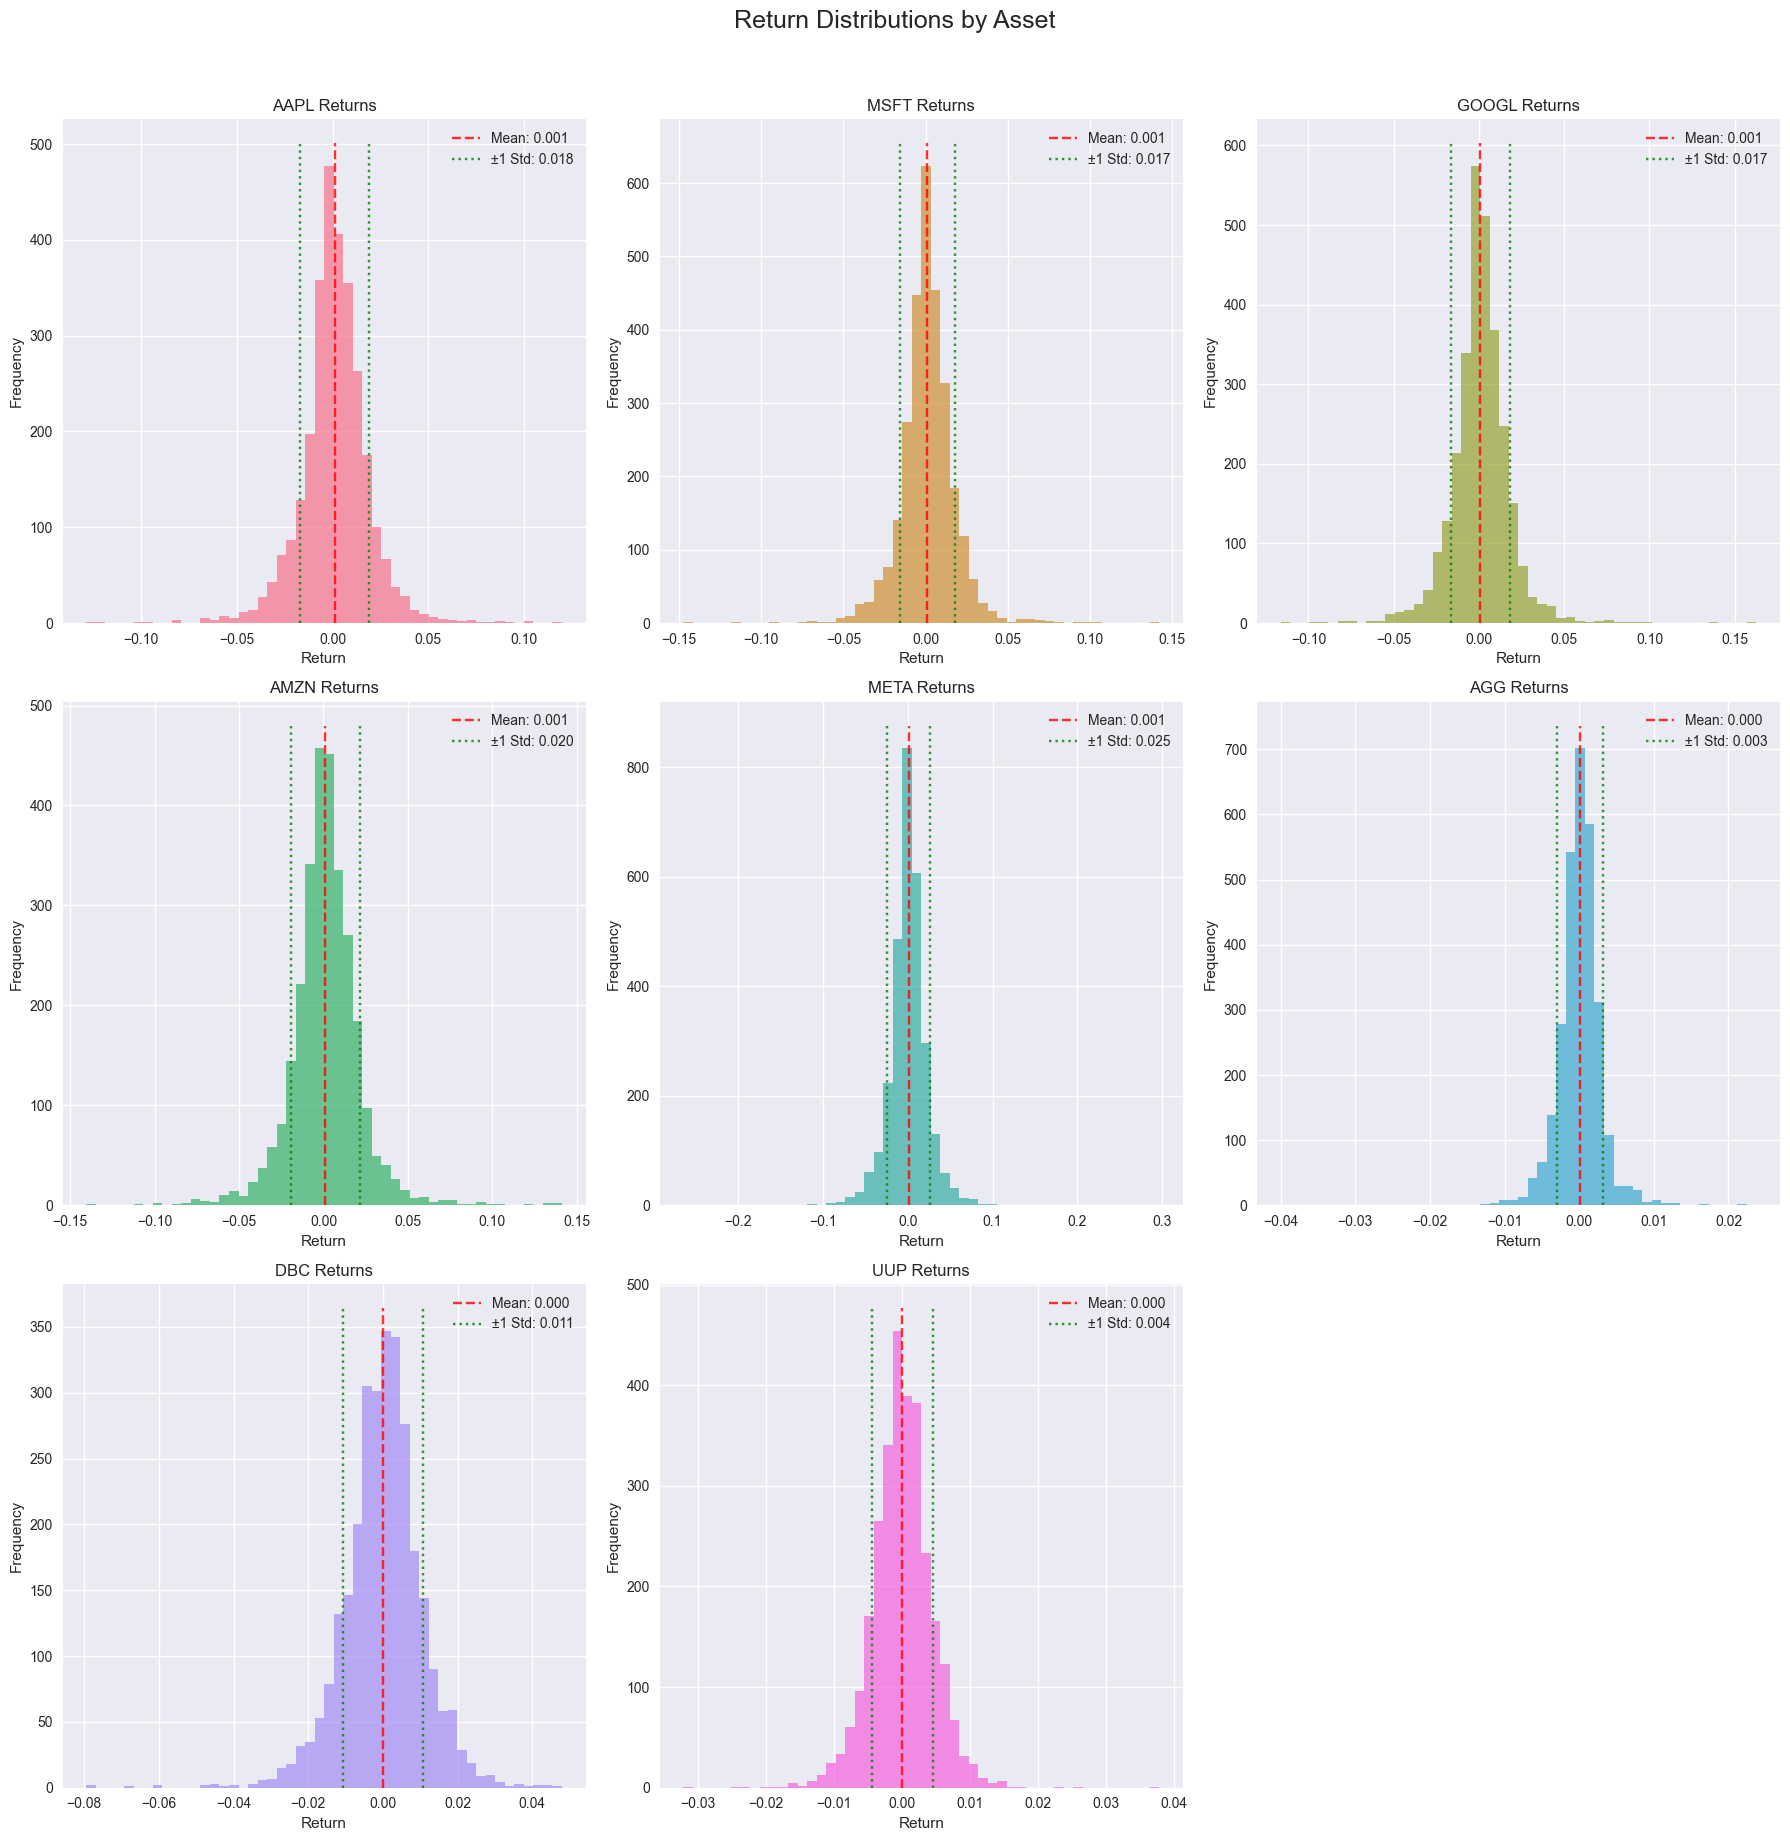

In [12]:
# Plot return distributions
n_assets = len(returns.columns)
n_rows = int(np.ceil(n_assets/3))
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 6*n_rows))
axes = axes.ravel()

# Create color palette with enough colors
colors = sns.color_palette('husl', n_colors=n_assets)

# Plot histograms for each asset
for i, (col, ax) in enumerate(zip(returns.columns, axes[:n_assets])):
    returns[col].hist(bins=50, ax=ax, alpha=0.7, color=colors[i])
    ax.set_title(f'{col} Returns')
    ax.set_xlabel('Return')
    ax.set_ylabel('Frequency')
    
    # Add mean and std dev lines
    mean = returns[col].mean()
    std = returns[col].std()
    ylim = ax.get_ylim()
    ax.vlines(mean, *ylim, color='red', linestyles='--', alpha=0.8, label=f'Mean: {mean:.3f}')
    ax.vlines([mean-std, mean+std], *ylim, color='green', linestyles=':', alpha=0.8, label=f'±1 Std: {std:.3f}')
    ax.legend(fontsize=10)

# Remove empty subplots
for ax in axes[n_assets:]:
    fig.delaxes(ax)

plt.suptitle('Return Distributions by Asset', y=1.02, fontsize=18)
plt.tight_layout()
plt.show()

### Correlation Analysis

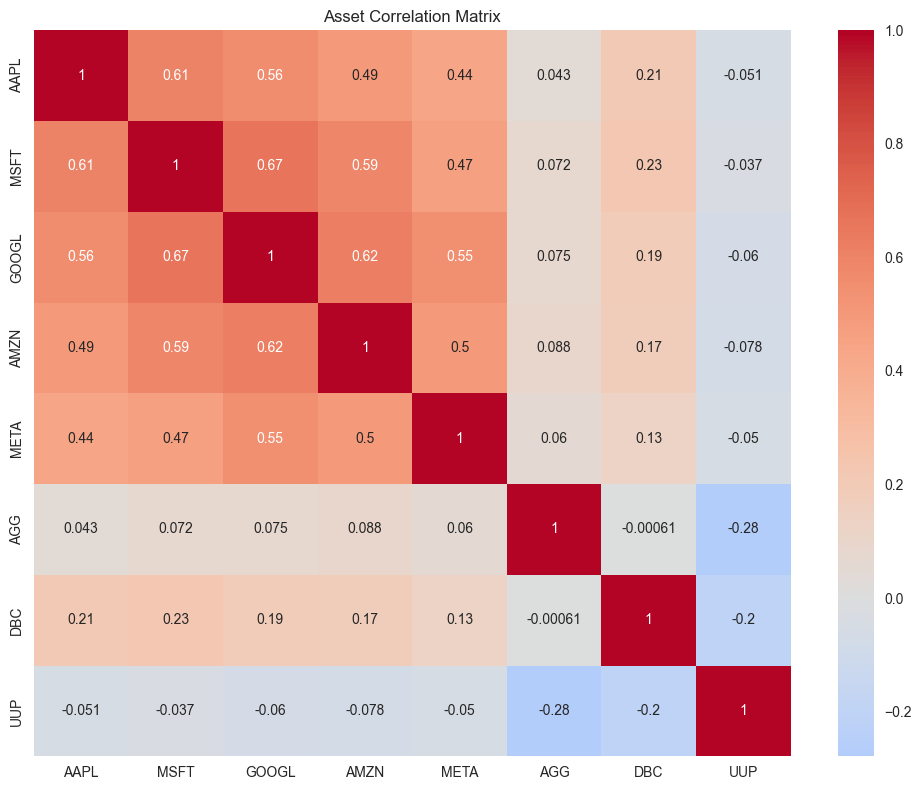

In [6]:
# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Asset Correlation Matrix')
plt.tight_layout()
plt.show()

## 2. Portfolio Optimization

Optimal Portfolio:
Sharpe Ratio: 0.01
Annual Return: 17.03%
Annual Volatility: 946.18%


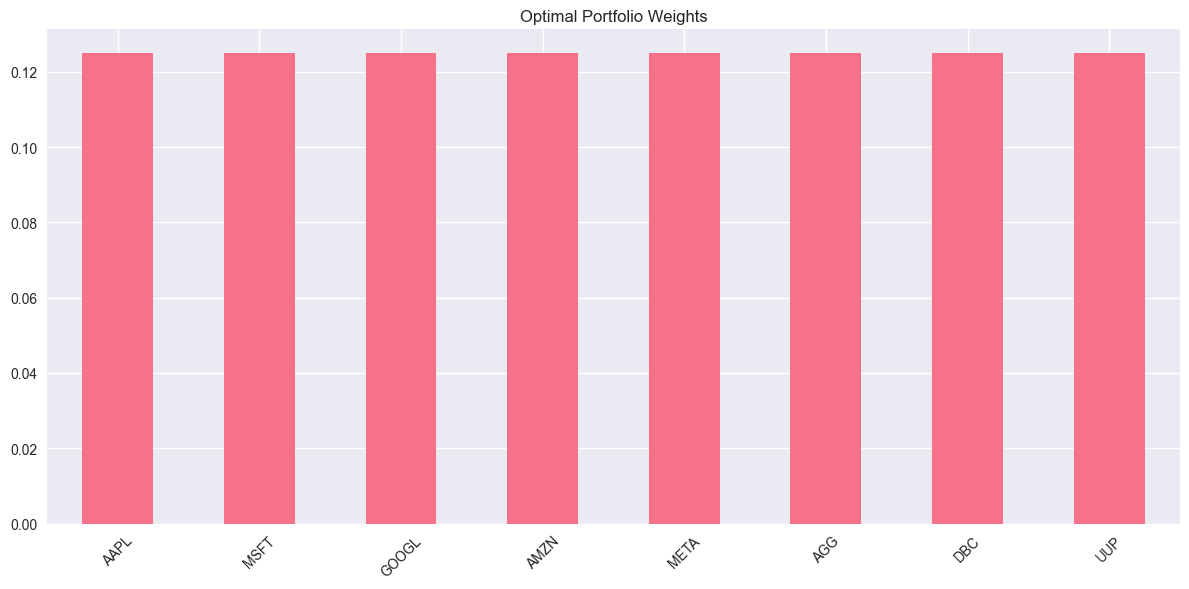

In [7]:
# Initialize optimizer
optimizer = PortfolioOptimizer()

# Optimize portfolio
result = optimizer.optimize_portfolio(returns)

print("Optimal Portfolio:")
print(f"Sharpe Ratio: {result['sharpe_ratio']:.2f}")
print(f"Annual Return: {result['return']:.2%}")
print(f"Annual Volatility: {result['volatility']:.2%}")

# Plot weights
plt.figure(figsize=(12, 6))
pd.Series(result['weights']).plot(kind='bar')
plt.title('Optimal Portfolio Weights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. Efficient Frontier

In [13]:
# Generate efficient frontier
ef = optimizer.generate_efficient_frontier(returns)

# Plot efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(ef['volatility'], ef['return'], c=ef['sharpe_ratio'], 
           cmap='viridis', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.title('Efficient Frontier')
plt.tight_layout()
plt.show()

Generating Efficient Frontier: 100%|██████████| 50/50 [01:59<00:00,  2.39s/it]


Exception: Failed to generate efficient frontier: Failed to generate any efficient frontier points